In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [10]:
# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [12]:
X_ = pd.DataFrame(
    X,
    columns=iris["feature_names"], # type: ignore
)

In [15]:
X_["target"] = y

In [16]:
X_.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X[:, [2, 3]], y, test_size=0.2, random_state=1
)

In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = nb.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [27]:
%pip install --quiet mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

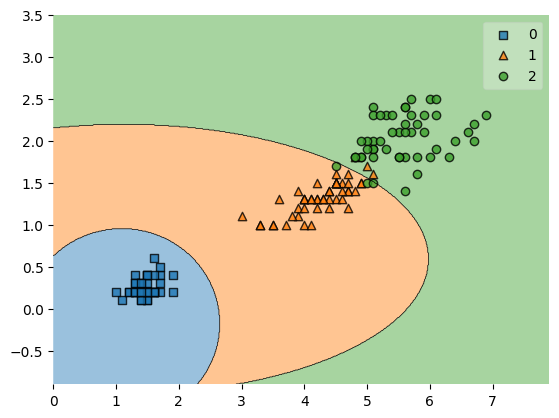

In [29]:
plot_decision_regions(X[:,[2,3]], y, nb)

In [32]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
y_pred = dt.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

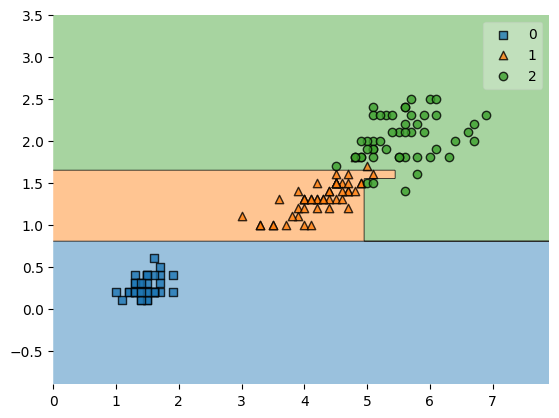

In [35]:
plot_decision_regions(X[:, [2, 3]], y, dt)